In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
data = pd.read_excel('smoker-medical-data.xlsx')
data.head()

,Age,Gender,Smoker status,Disease
0,43,Male,Smoker,diseased
1,18,Male,Smoker,not diseased
2,22,Female,Non-smoker,diseased
3,25,Male,Non-smoker,diseased
4,45,Female,Smoker,not diseased


In [5]:
data.shape

(36, 4)

In [6]:
data.isna().sum()

Age              0
Gender           0
Smoker status    0
Disease          0
dtype: int64

In [7]:
data[data.duplicated()]

,Age,Gender,Smoker status,Disease
16,27,Male,Non-smoker,not diseased
32,44,Male,Smoker,diseased
33,88,Male,Non-smoker,diseased
34,33,Male,Non-smoker,not diseased
35,43,Female,Non-smoker,not diseased


In [8]:
data.drop_duplicates(inplace=True)
data.shape

(31, 4)

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Smoker status'] = le.fit_transform(data['Smoker status'])
data.head()

,Age,Gender,Smoker status,Disease
0,43,1,1,diseased
1,18,1,1,not diseased
2,22,0,0,diseased
3,25,1,0,diseased
4,45,0,1,not diseased


In [10]:
data.columns

Index(['Age', 'Gender', 'Smoker status', 'Disease'], dtype='object')

In [11]:
feature_cols = ['Age', 'Gender', 'Smoker status']
X = data[feature_cols]
y = data.Disease

In [11]:
X.head()

,Age,Gender,Smoker status
0,43,1,1
1,18,1,1
2,22,0,0
3,25,1,0
4,45,0,1


In [12]:
model = LogisticRegression()
model.fit(X , y)

LogisticRegression()

In [13]:
pred = model.predict(X)
pred

array(['diseased', 'not diseased', 'not diseased', 'not diseased',
       'diseased', 'not diseased', 'diseased', 'diseased', 'not diseased',
       'not diseased', 'diseased', 'diseased', 'diseased', 'diseased',
       'diseased', 'diseased', 'diseased', 'diseased', 'diseased',
       'diseased', 'diseased', 'not diseased', 'not diseased', 'diseased',
       'diseased', 'diseased', 'diseased', 'not diseased', 'not diseased',
       'diseased', 'diseased'], dtype=object)

In [17]:
cm = confusion_matrix(y, pred)
cm

array([[15,  3],
       [ 6,  7]])

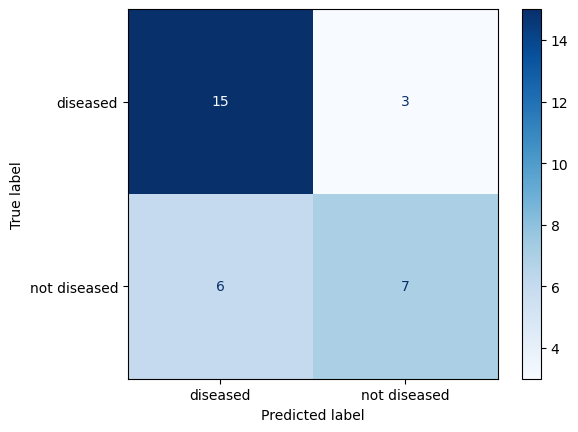

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
cmd.plot(cmap='Blues')
plt.show()

In [19]:
accuracy_score(y, pred)

0.7096774193548387

In [20]:
data['Pred'] = pred

In [21]:
data

,Age,Gender,Smoker status,Disease,Pred
0,43,1,1,diseased,diseased
1,18,1,1,not diseased,not diseased
2,22,0,0,diseased,not diseased
3,25,1,0,diseased,not diseased
4,45,0,1,not diseased,diseased
5,12,1,0,not diseased,not diseased
6,23,1,1,diseased,diseased
7,33,1,1,diseased,diseased
8,27,1,0,not diseased,not diseased
9,27,0,0,not diseased,not diseased


In [22]:
data['Gender'] = data['Gender'].map({0 : 'Female', 1 : 'Male'})
data['Smoker status'] = data['Smoker status'].map({0 : 'Non-smoker', 1 : 'Smoker'})
data.head()

,Age,Gender,Smoker status,Disease,Pred
0,43,Male,Smoker,diseased,diseased
1,18,Male,Smoker,not diseased,not diseased
2,22,Female,Non-smoker,diseased,not diseased
3,25,Male,Non-smoker,diseased,not diseased
4,45,Female,Smoker,not diseased,diseased


In [19]:
data[ data['Disease'] != data['Pred']]

,Age,Gender,Smoker status,Disease,Pred
2,22,Female,Non-smoker,diseased,not diseased
3,25,Male,Non-smoker,diseased,not diseased
4,45,Female,Smoker,not diseased,diseased
14,24,Male,Smoker,not diseased,diseased
17,34,Female,Smoker,not diseased,diseased
24,32,Female,Smoker,not diseased,diseased
25,66,Male,Smoker,not diseased,diseased
27,34,Male,Non-smoker,not diseased,diseased
28,27,Male,Non-smoker,diseased,not diseased


In [25]:
age = int(input("Enter age of paitent:"))
gen = int(input('Male-1 / Female-0: '))
ss = int(input('Non-smoker-0 / Smoker-1: '))
model.predict([[age, gen, ss]])[0]

Enter age of paitent: 20
Male-1 / Female-0:  1
Non-smoker-0 / Smoker-1:  1


'diseased'